## Metrics

汇总常见2分类的指标，例如: AUC，ROC曲线，ACC, 敏感性， 特异性，精确度，召回率，PPV, NPV, F1

具体的介绍，可以参考一下：https://blog.csdn.net/sunflower_sara/article/details/81214897

In [17]:
import os
import pandas as pd
from datetime import datetime
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
group_info = pd.read_csv('split_info/label-RND-0.csv')[['ID', 'group']]
group_info = pd.read_csv('group.csv')[['ID', 'group']]
group_info['ID'] = group_info['ID'].map(lambda x: x.replace('.png', '.gz'))
display(group_info['group'].value_counts())
group_info

train    268
val      115
test      75
Name: group, dtype: int64

,ID,group
0,primary-1.nii.gz,train
1,primary-10.nii.gz,train
2,primary-100.nii.gz,train
3,primary-102.nii.gz,train
4,primary-104.nii.gz,train
...,...,...
453,secondary2-69.nii.gz,test
454,secondary2-7.nii.gz,test
455,secondary2-71.nii.gz,test
456,secondary2-72.nii.gz,test


[2024-09-15 20:40:27 - __init__.py:  58]	WARNING	存在ID特征不完全匹配的问题！在左边不在右边的ID：{'secondary2-38.nii.gz', 'secondary1-3.nii.gz', 'secondary2-64.nii.gz', 'secondary2-31.nii.gz', 'primary-323.nii.gz', 'secondary2-2.nii.gz', 'secondary1-19.nii.gz', 'secondary1-11.nii.gz', 'secondary2-51.nii.gz', 'secondary2-34.nii.gz', 'secondary2-18.nii.gz', 'secondary2-65.nii.gz', 'secondary2-9.nii.gz', 'primary-310.nii.gz', 'primary-234.nii.gz', 'primary-5.nii.gz', 'primary-90.nii.gz', 'secondary2-52.nii.gz', 'primary-269.nii.gz', 'primary-344.nii.gz', 'secondary1-12.nii.gz', 'secondary2-58.nii.gz', 'primary-64.nii.gz', 'secondary2-44.nii.gz', 'primary-8.nii.gz', 'secondary2-68.nii.gz', 'secondary1-22.nii.gz', 'secondary2-20.nii.gz', 'secondary2-53.nii.gz', 'secondary1-9.nii.gz', 'secondary2-42.nii.gz', 'secondary2-29.nii.gz', 'primary-2.nii.gz', 'secondary1-29.nii.gz', 'secondary2-55.nii.gz', 'primary-226.nii.gz', 'secondary2-70.nii.gz', 'primary-82.nii.gz', 'primary-147.nii.gz', 'primary-146.nii.gz', 'prim

2.5D 63 0 train (1835, 7)
2.5D 63 0 val (769, 7)
2.5D 63 0 test (470, 7)


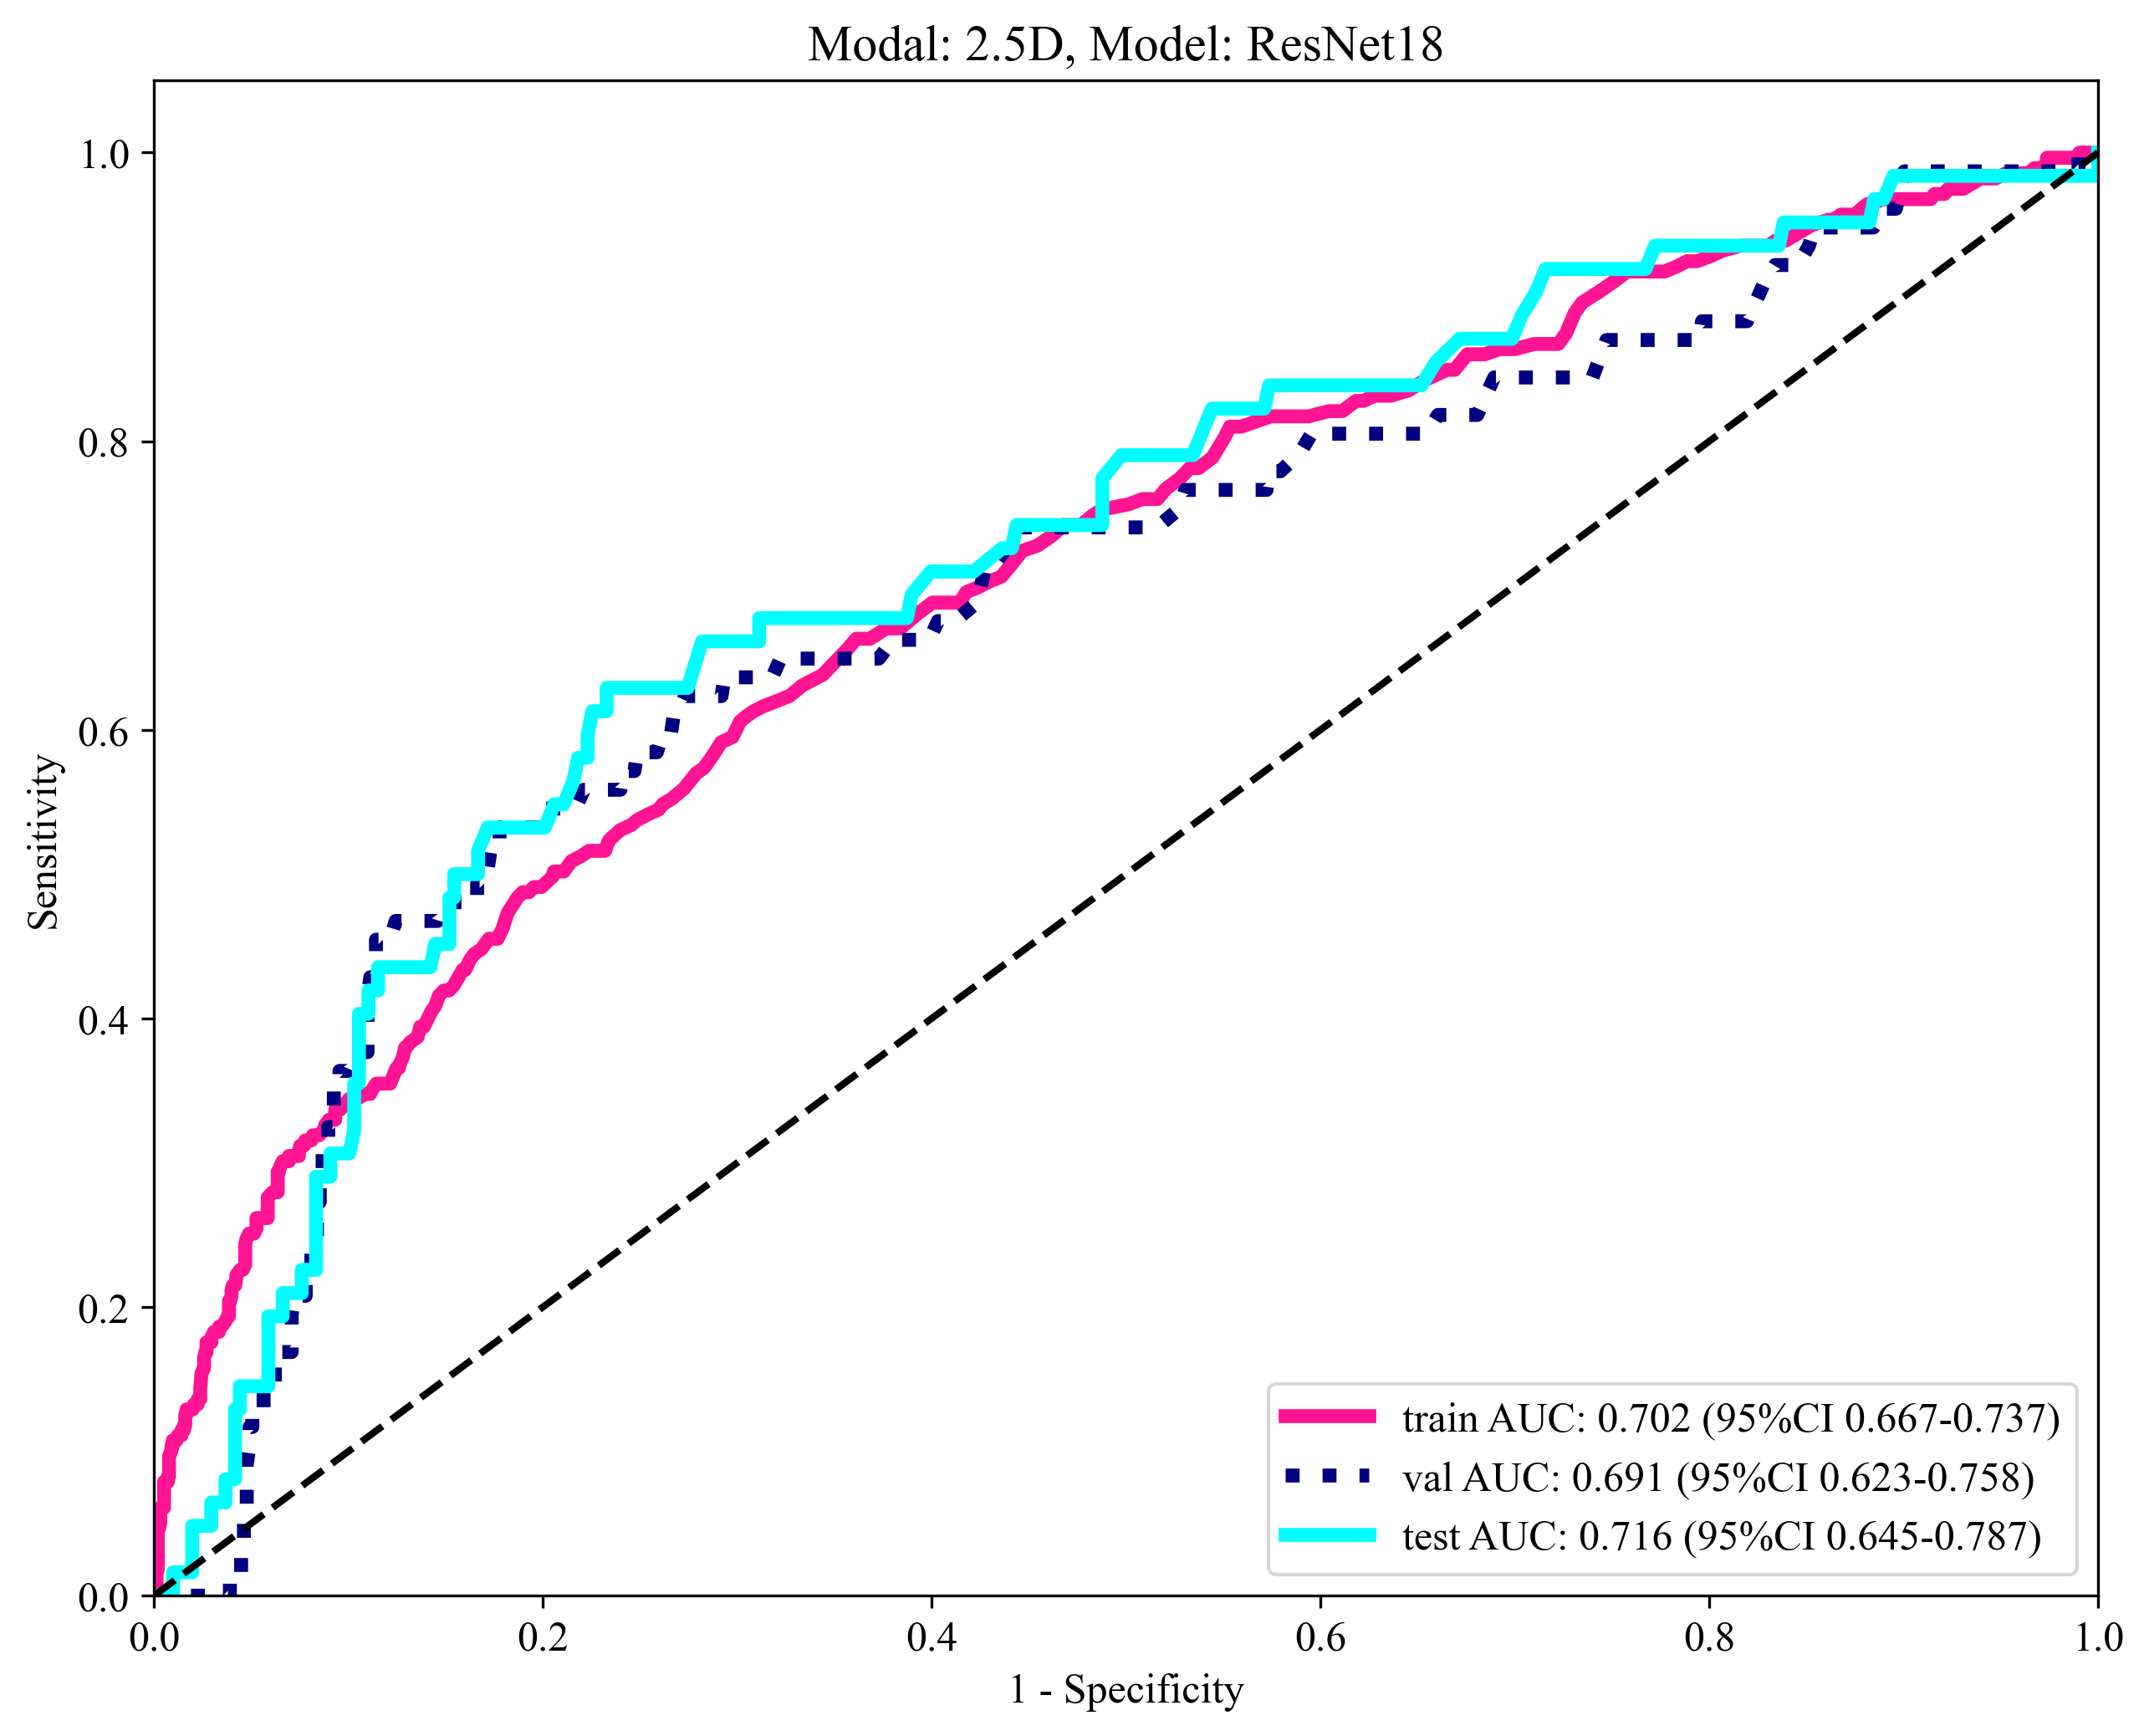

[2024-09-15 20:40:27 - __init__.py:  58]	WARNING	存在ID特征不完全匹配的问题！在左边不在右边的ID：{'secondary2-38.nii.gz', 'secondary1-3.nii.gz', 'secondary2-64.nii.gz', 'secondary2-31.nii.gz', 'primary-323.nii.gz', 'secondary2-2.nii.gz', 'secondary1-19.nii.gz', 'secondary1-11.nii.gz', 'secondary2-51.nii.gz', 'secondary2-34.nii.gz', 'secondary2-18.nii.gz', 'secondary2-65.nii.gz', 'secondary2-9.nii.gz', 'primary-310.nii.gz', 'primary-234.nii.gz', 'primary-5.nii.gz', 'primary-90.nii.gz', 'secondary2-52.nii.gz', 'primary-269.nii.gz', 'primary-344.nii.gz', 'secondary1-12.nii.gz', 'secondary2-58.nii.gz', 'primary-64.nii.gz', 'secondary2-44.nii.gz', 'primary-8.nii.gz', 'secondary2-68.nii.gz', 'secondary1-22.nii.gz', 'secondary2-20.nii.gz', 'secondary2-53.nii.gz', 'secondary1-9.nii.gz', 'secondary2-42.nii.gz', 'secondary2-29.nii.gz', 'primary-2.nii.gz', 'secondary1-29.nii.gz', 'secondary2-55.nii.gz', 'primary-226.nii.gz', 'secondary2-70.nii.gz', 'primary-82.nii.gz', 'primary-147.nii.gz', 'primary-146.nii.gz', 'prim

2.5D 63 0 train (1835, 7)
2.5D 63 0 val (769, 7)
2.5D 63 0 test (470, 7)


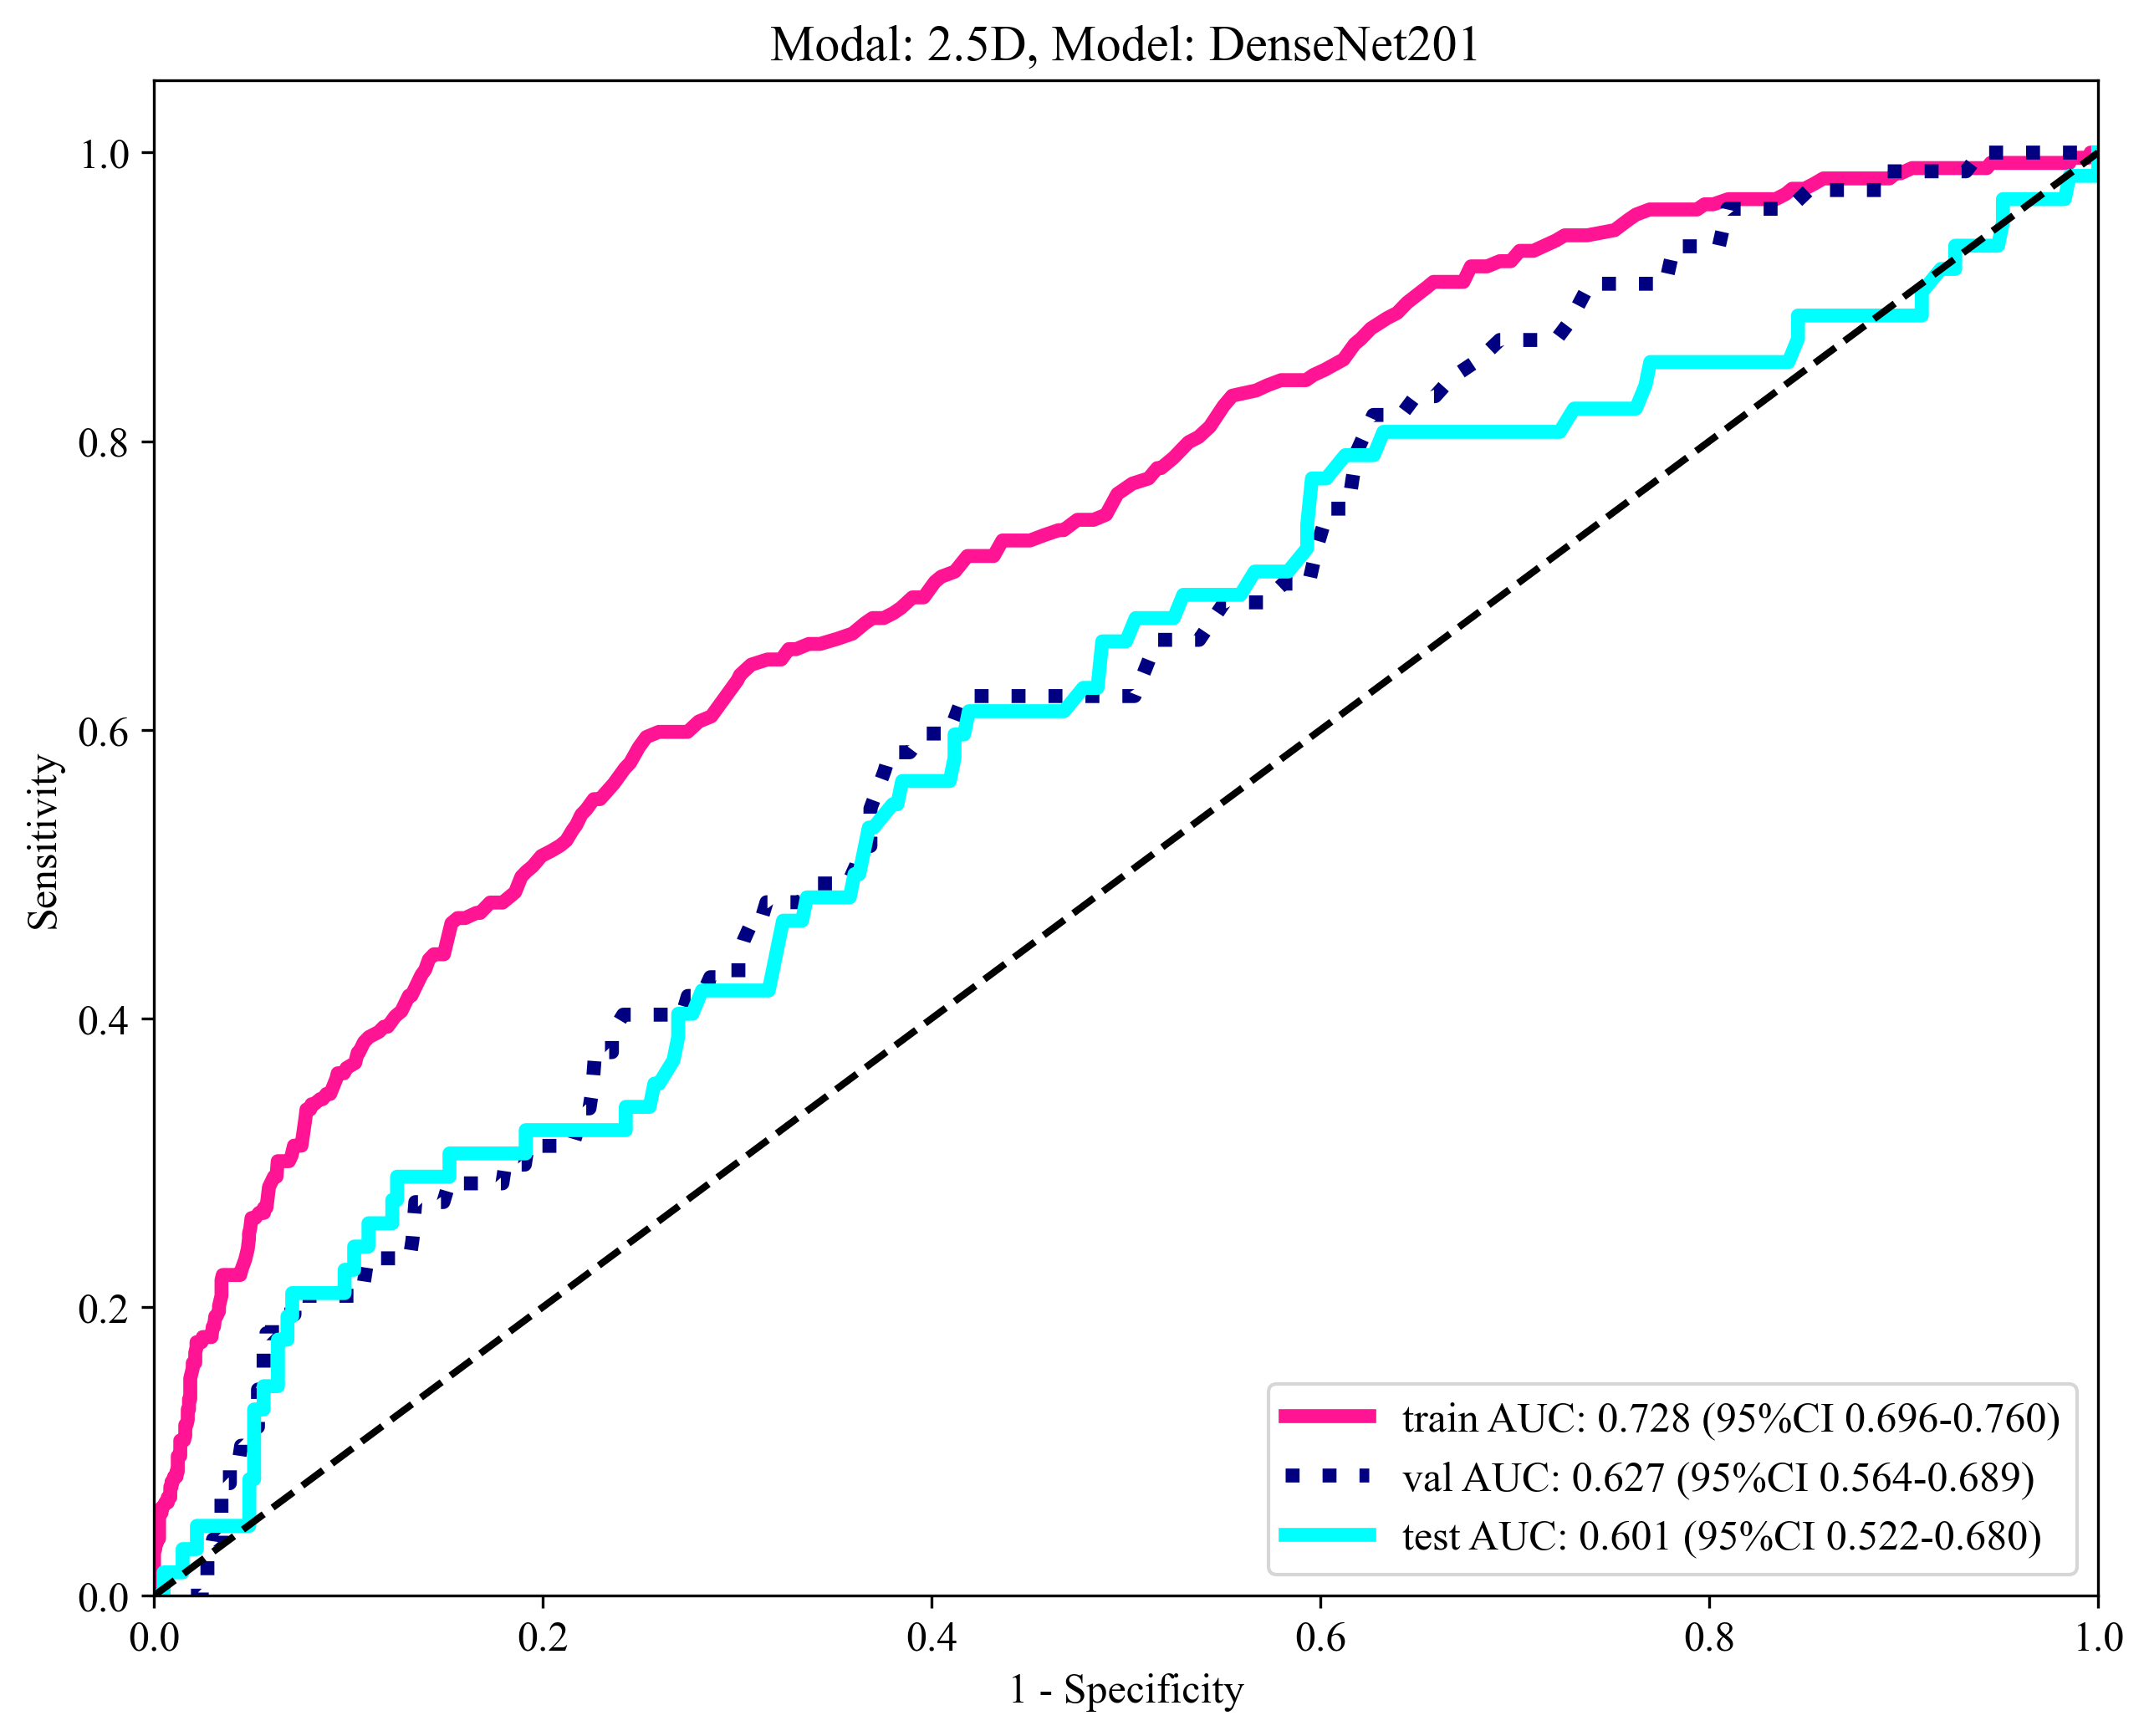

[2024-09-15 20:40:27 - __init__.py:  58]	WARNING	存在ID特征不完全匹配的问题！在左边不在右边的ID：{'secondary2-38.nii.gz', 'secondary1-3.nii.gz', 'secondary2-64.nii.gz', 'secondary2-31.nii.gz', 'primary-323.nii.gz', 'secondary2-2.nii.gz', 'secondary1-19.nii.gz', 'secondary1-11.nii.gz', 'secondary2-51.nii.gz', 'secondary2-34.nii.gz', 'secondary2-18.nii.gz', 'secondary2-65.nii.gz', 'secondary2-9.nii.gz', 'primary-310.nii.gz', 'primary-234.nii.gz', 'primary-5.nii.gz', 'primary-90.nii.gz', 'secondary2-52.nii.gz', 'primary-269.nii.gz', 'primary-344.nii.gz', 'secondary1-12.nii.gz', 'secondary2-58.nii.gz', 'primary-64.nii.gz', 'secondary2-44.nii.gz', 'primary-8.nii.gz', 'secondary2-68.nii.gz', 'secondary1-22.nii.gz', 'secondary2-20.nii.gz', 'secondary2-53.nii.gz', 'secondary1-9.nii.gz', 'secondary2-42.nii.gz', 'secondary2-29.nii.gz', 'primary-2.nii.gz', 'secondary1-29.nii.gz', 'secondary2-55.nii.gz', 'primary-226.nii.gz', 'secondary2-70.nii.gz', 'primary-82.nii.gz', 'primary-147.nii.gz', 'primary-146.nii.gz', 'prim

2.5D 63 0 train (1835, 7)
2.5D 63 0 val (769, 7)
2.5D 63 0 test (470, 7)


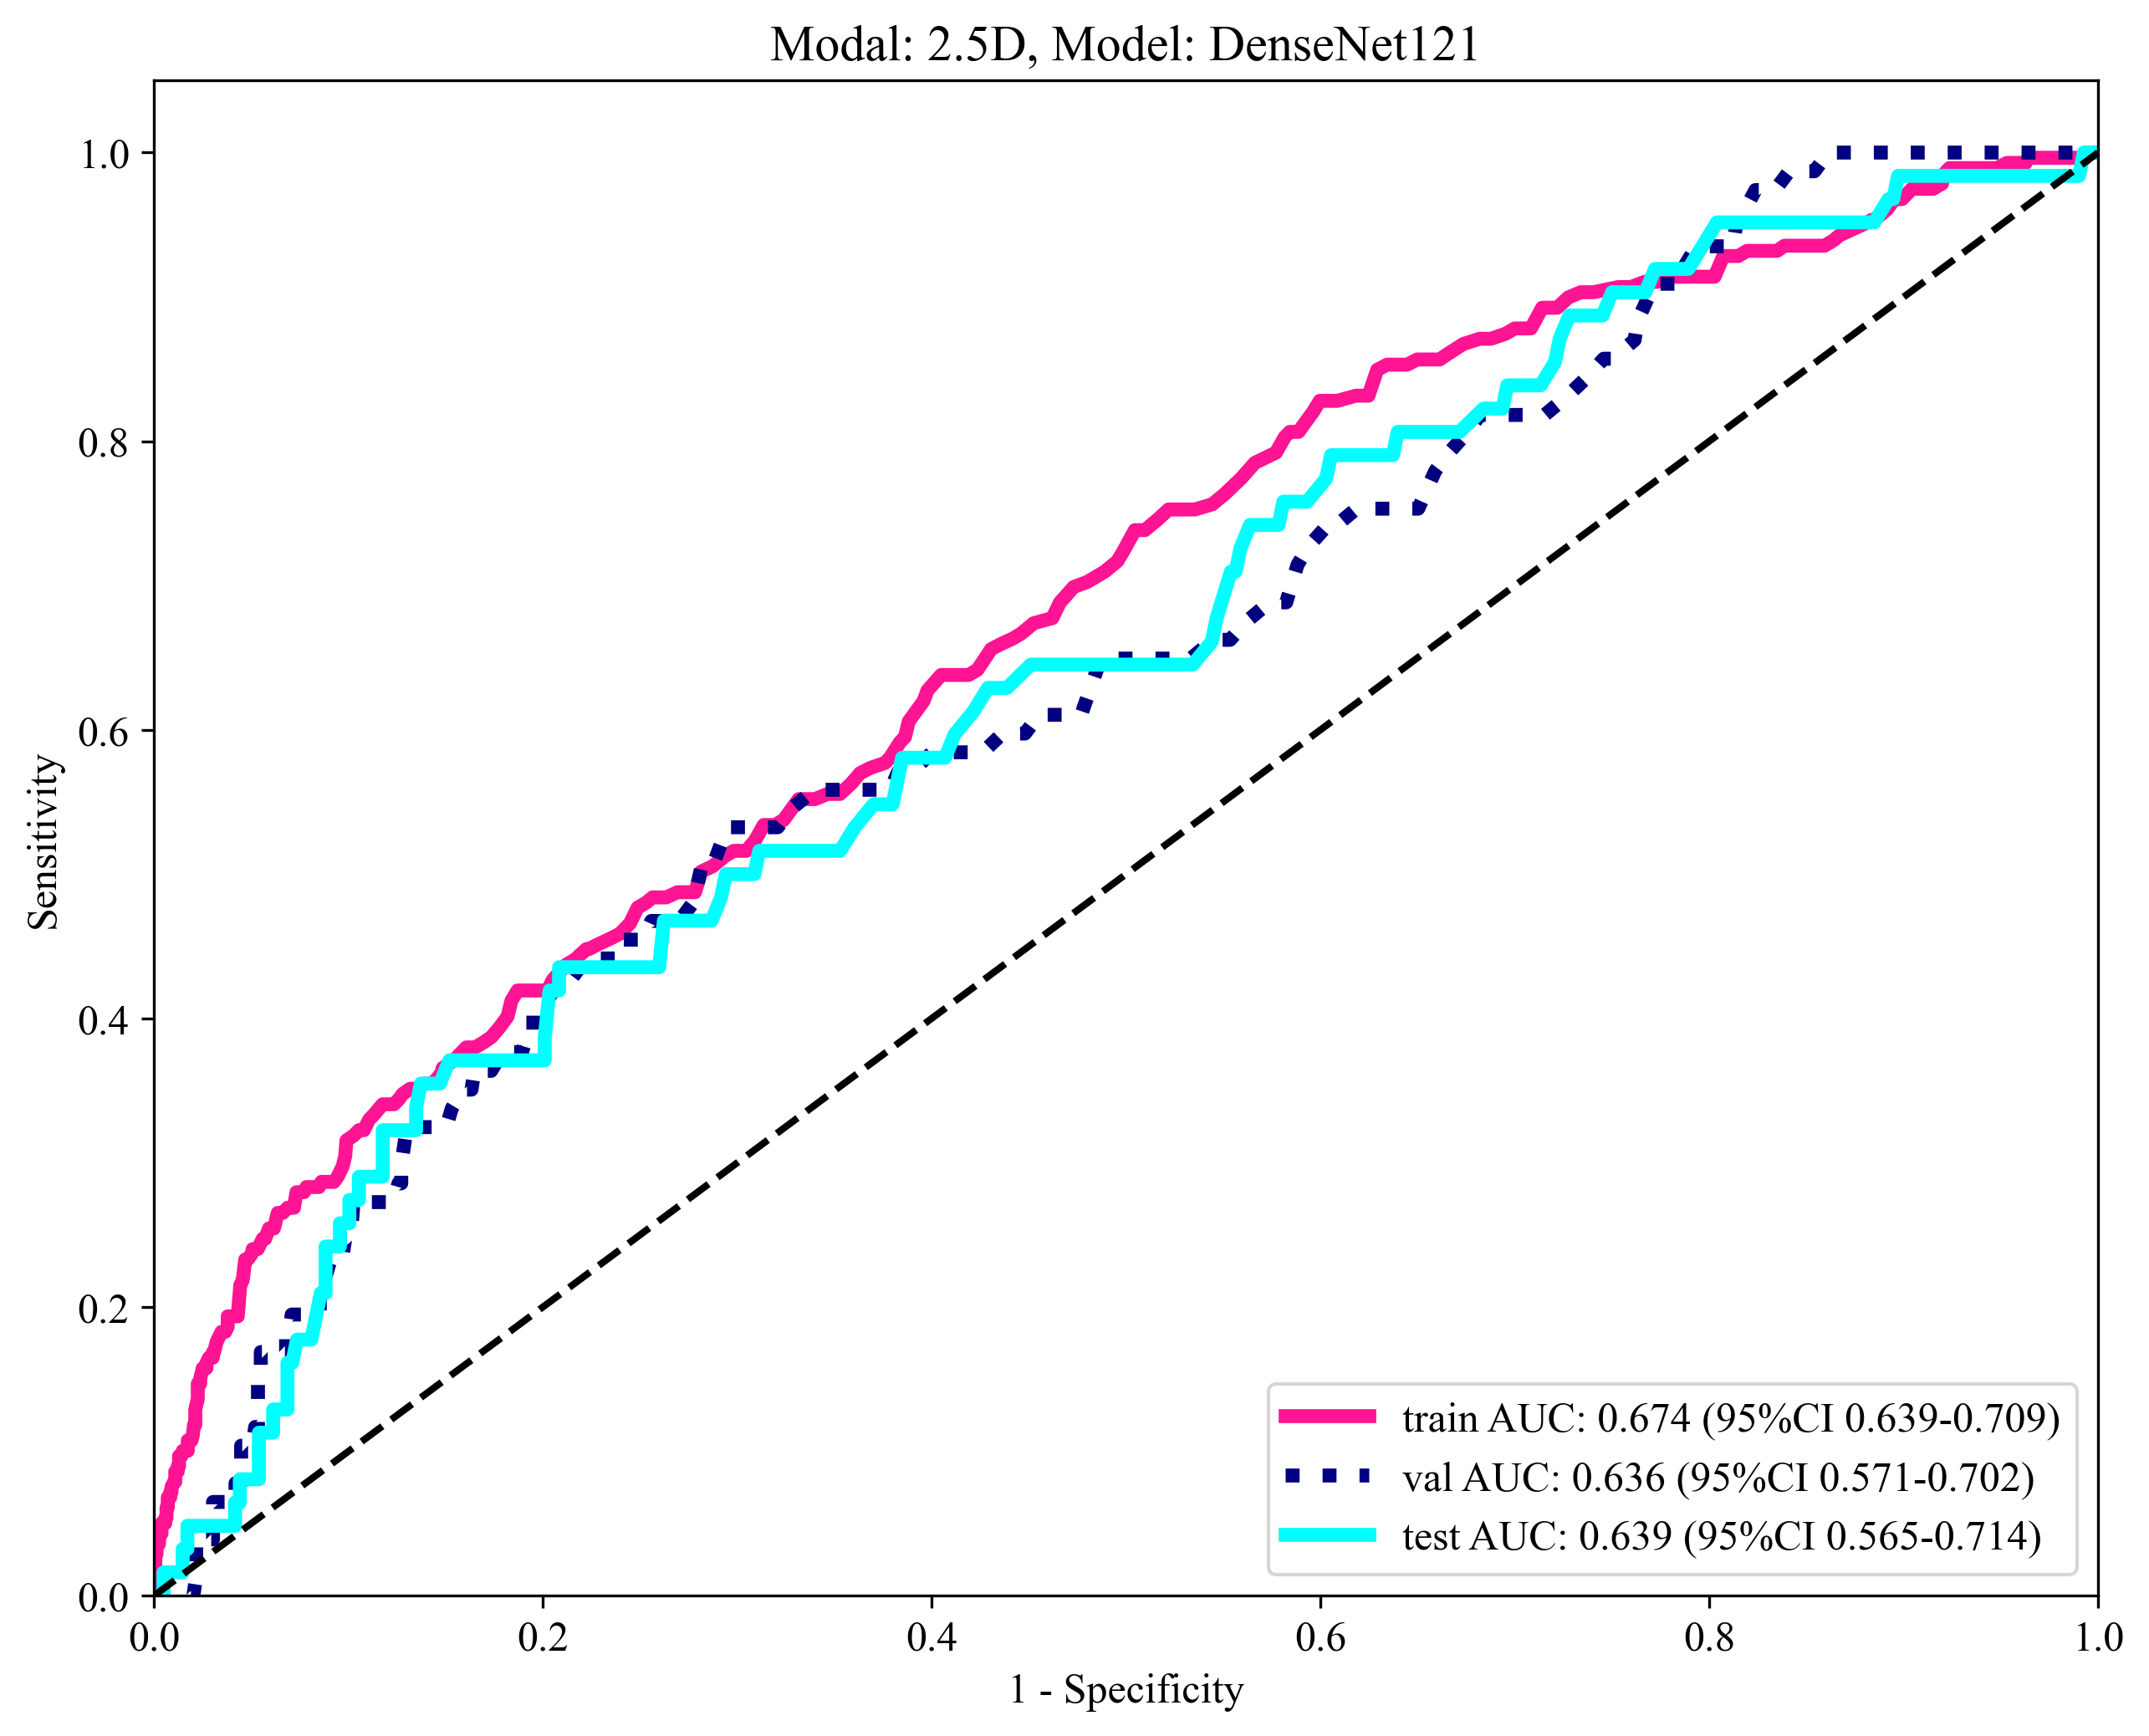

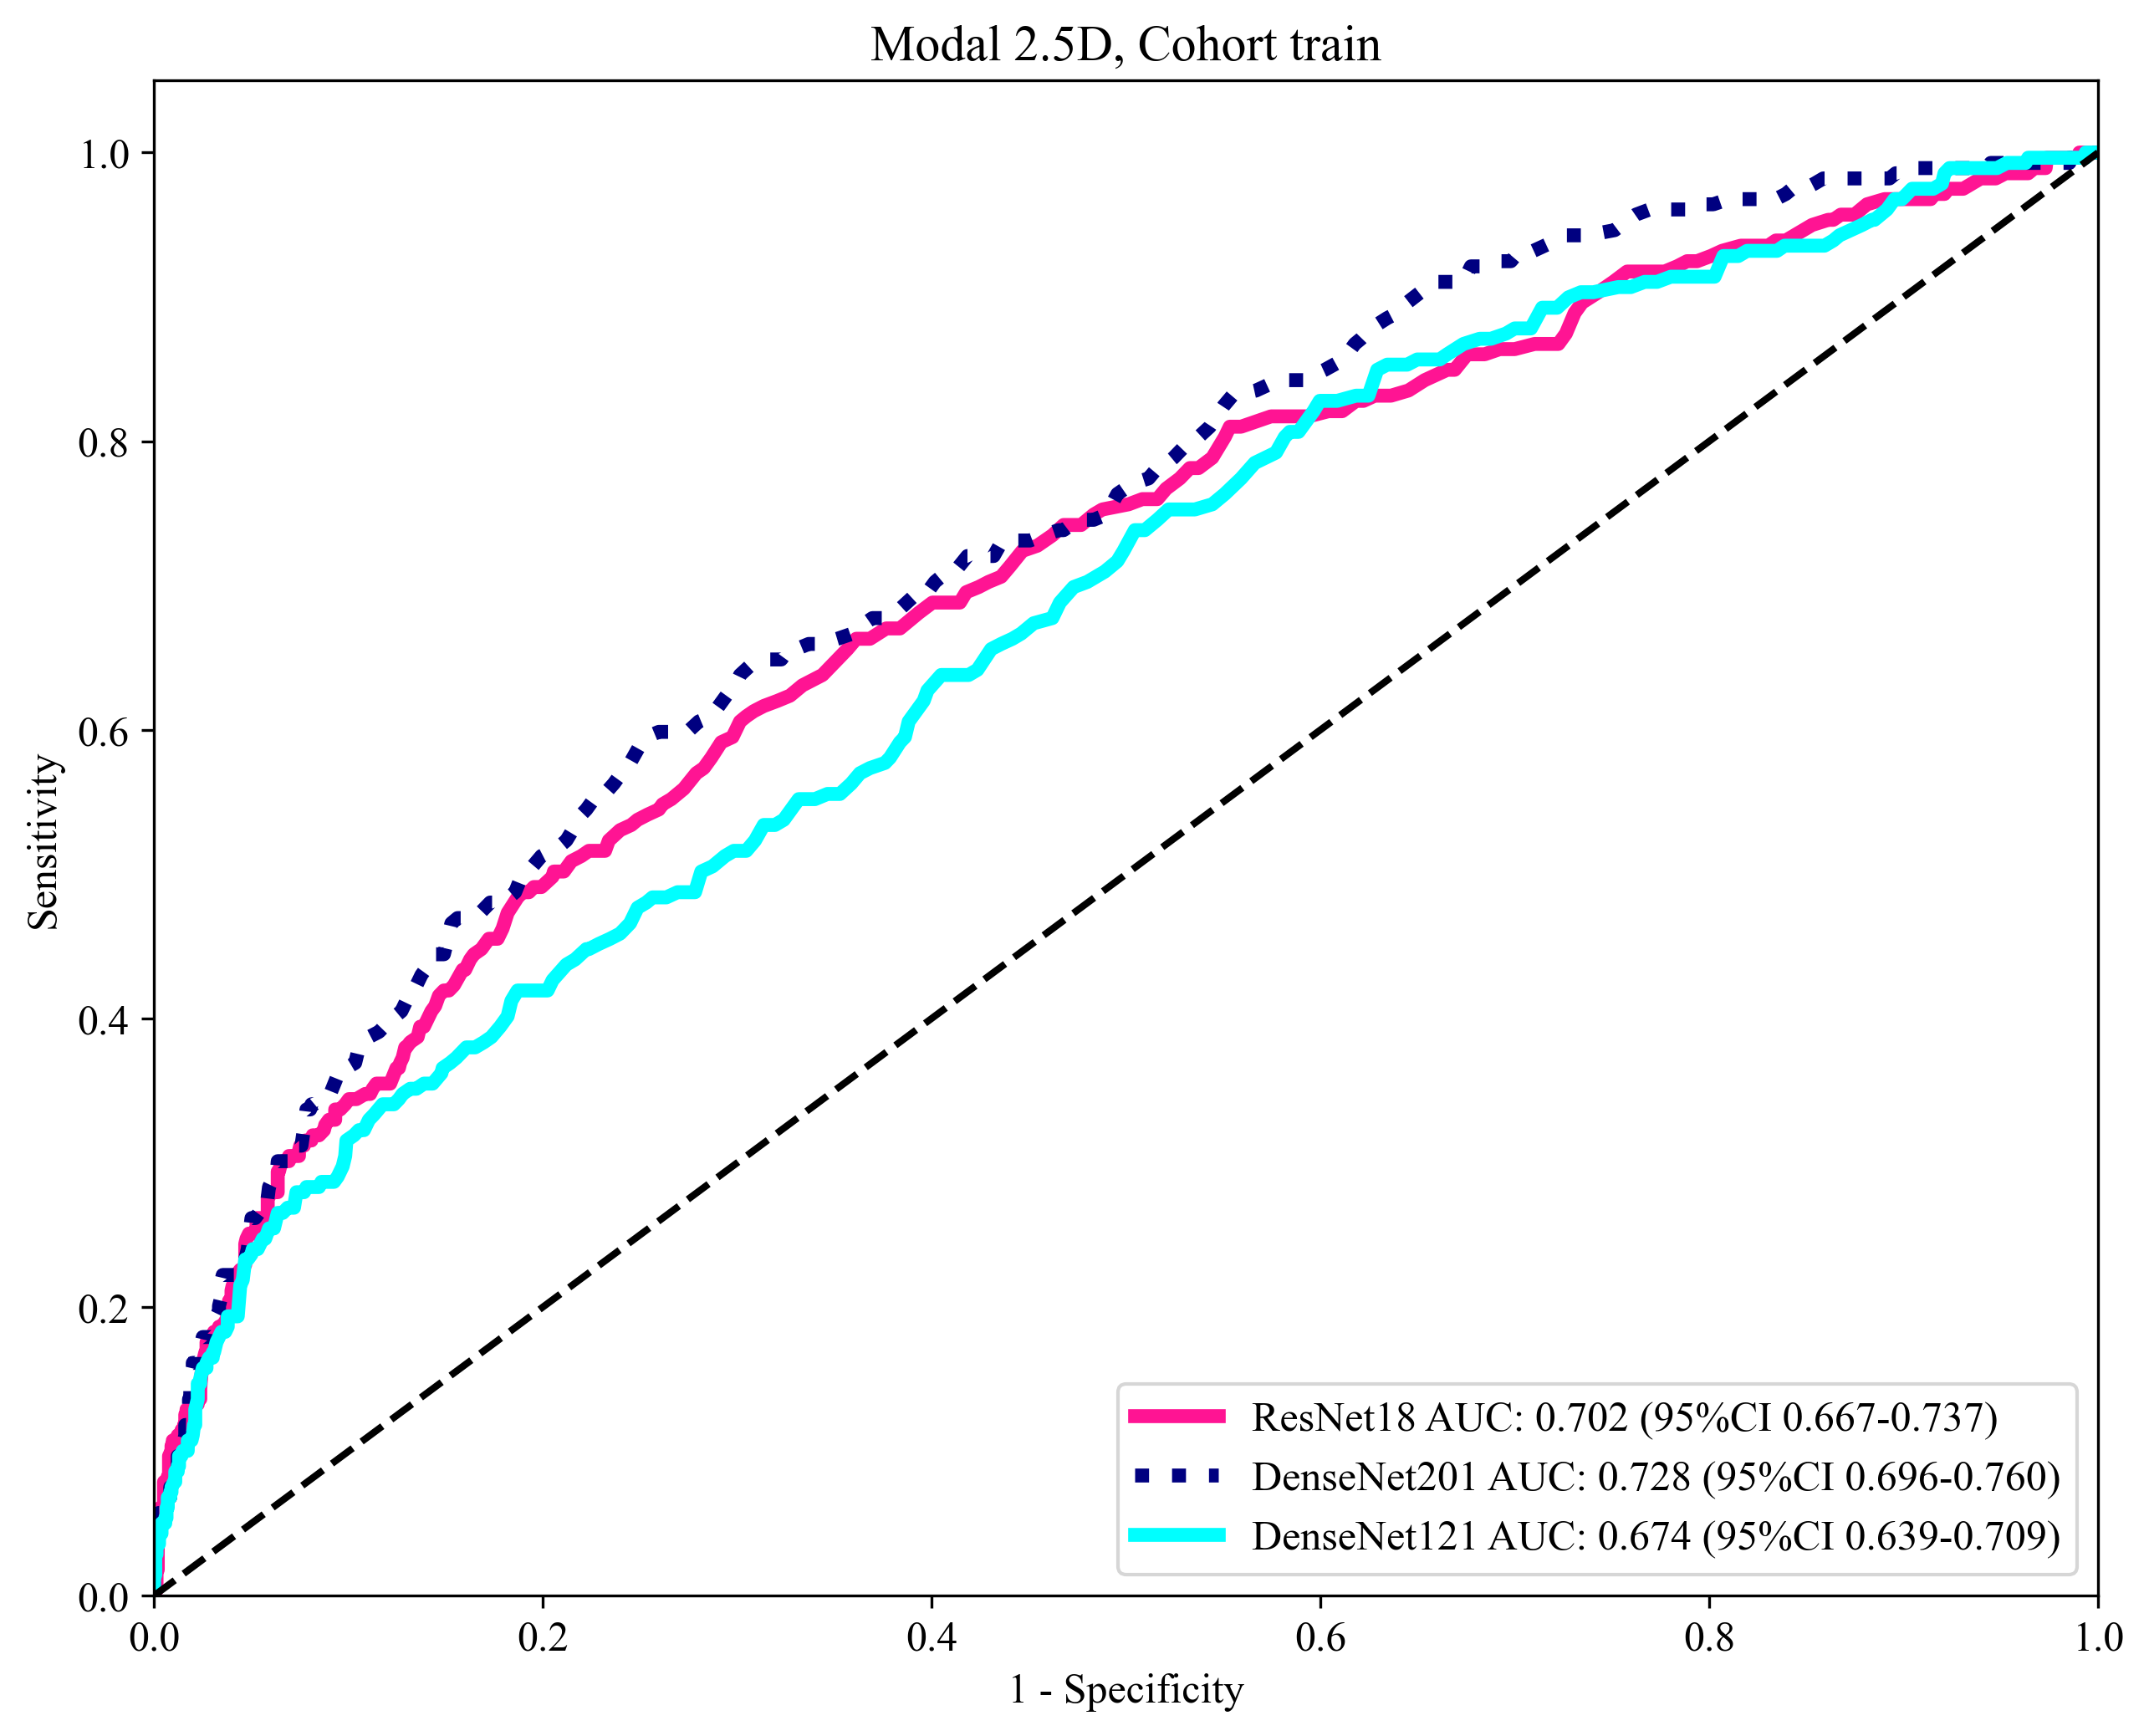

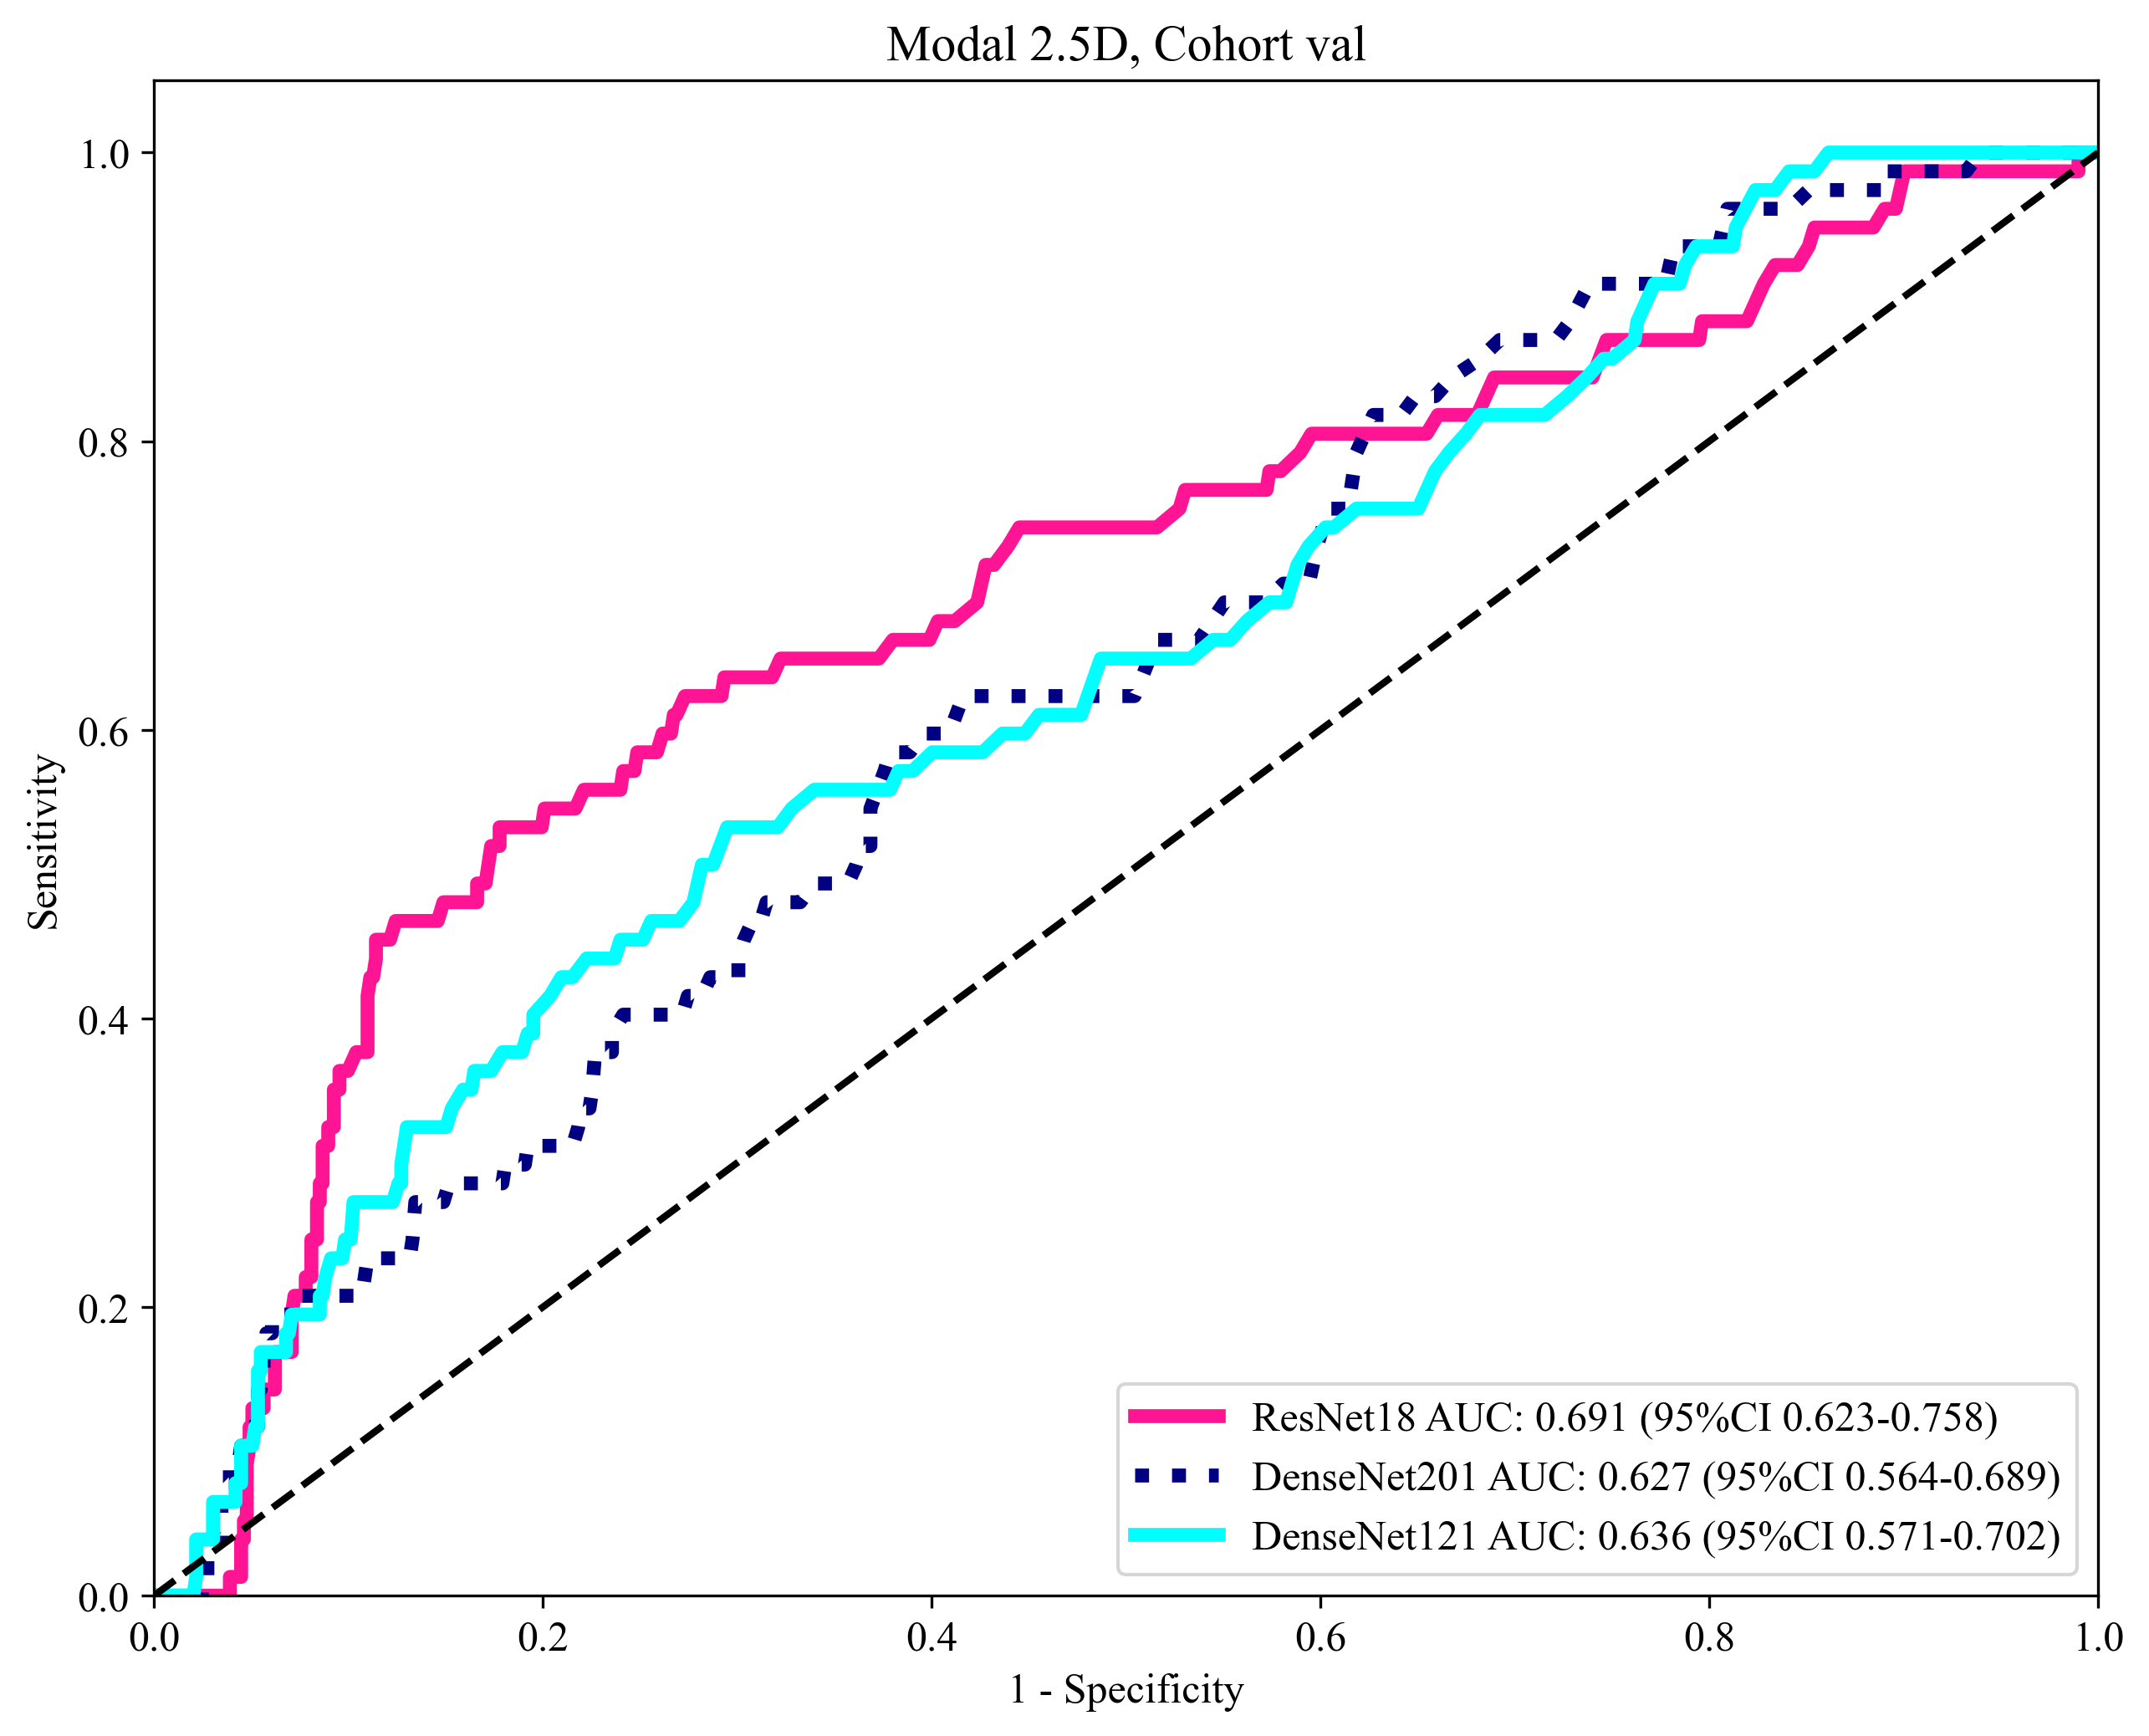

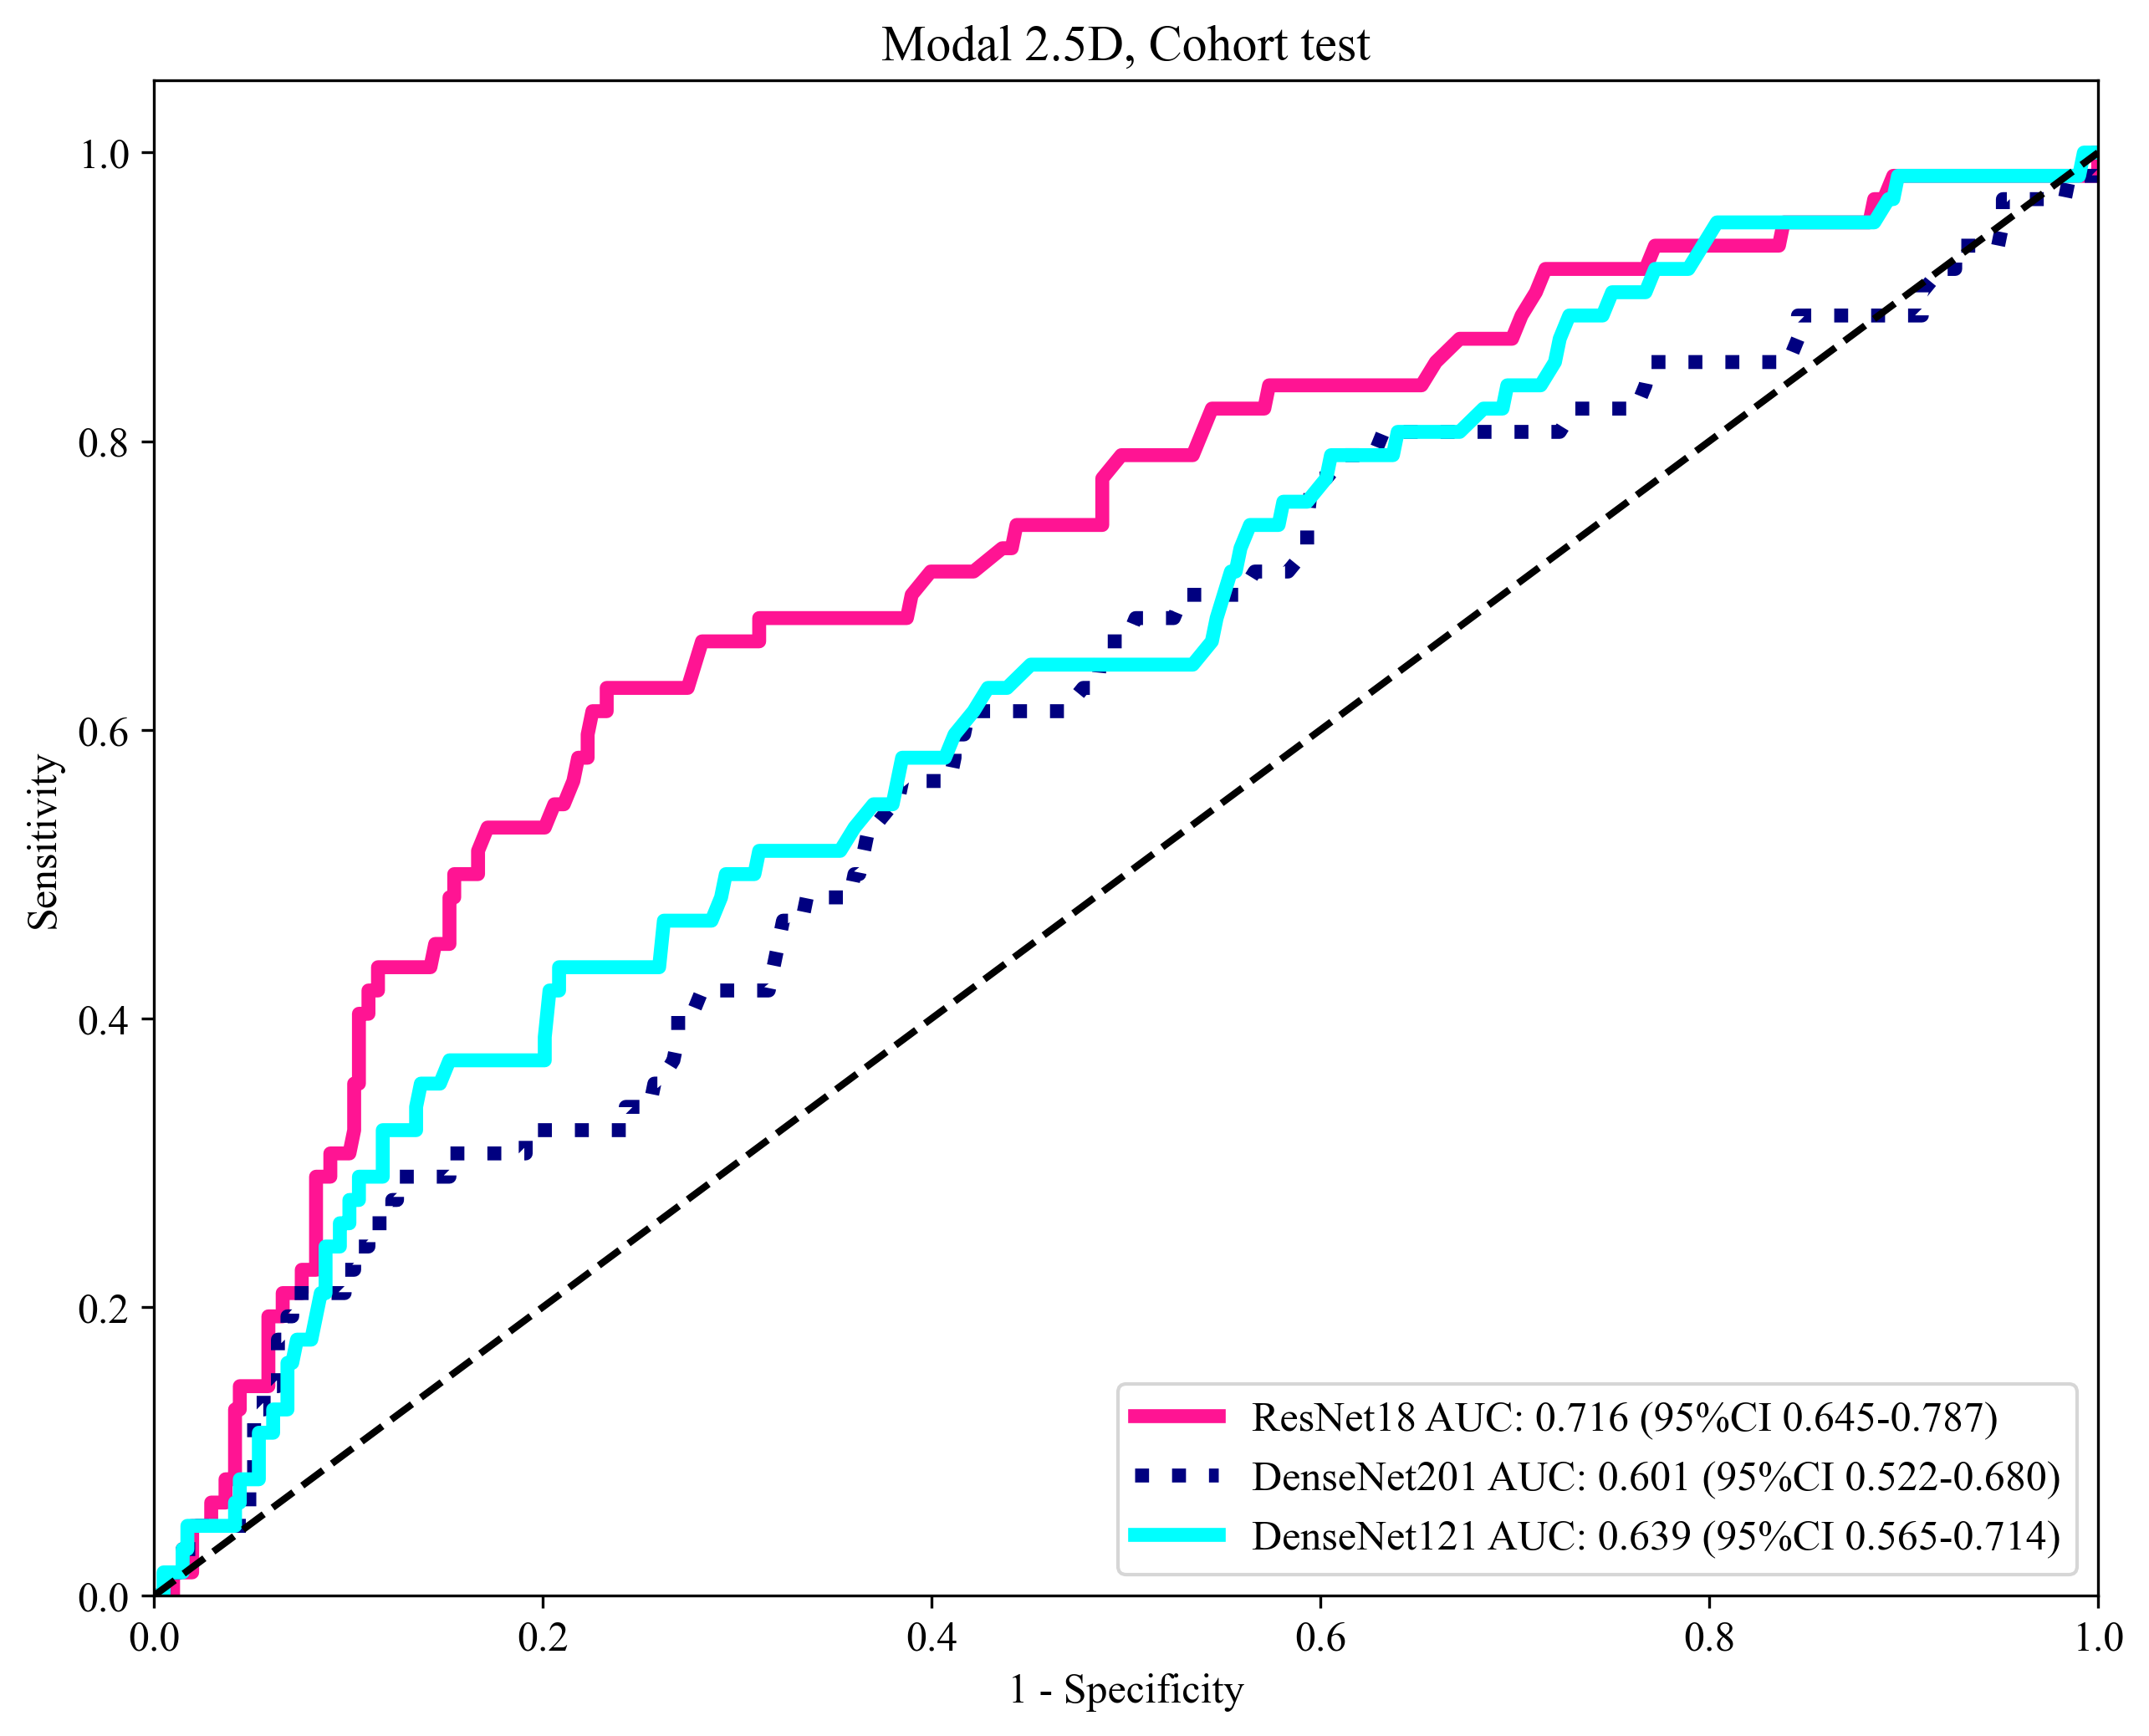

,ModelName,Acc,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Youden,Modal,Cohort
0,resnet18,0.684,0.702,0.6672-0.7367,0.606,0.699,0.265,0.908,0.189,2.5D,train
1,resnet18,0.792,0.691,0.6232-0.7578,0.519,0.822,0.245,0.939,0.188,2.5D,val
2,resnet18,0.747,0.716,0.6451-0.7874,0.613,0.767,0.286,0.929,0.214,2.5D,test
3,densenet201,0.726,0.728,0.6959-0.7604,0.588,0.751,0.297,0.910,0.190,2.5D,train
4,densenet201,0.592,0.627,0.5640-0.6892,0.597,0.591,0.140,0.930,0.126,2.5D,val
5,densenet201,0.585,0.601,0.5224-0.6804,0.597,0.583,0.179,0.905,0.156,2.5D,test
6,densenet121,0.535,0.674,0.6388-0.7085,0.724,0.501,0.207,0.910,0.188,2.5D,train
7,densenet121,0.692,0.636,0.5709-0.7021,0.506,0.712,0.164,0.928,0.129,2.5D,val
8,densenet121,0.743,0.639,0.5651-0.7136,0.419,0.792,0.234,0.900,0.189,2.5D,test


,ModelName,Acc,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Youden,Modal,Cohort
0,resnet18,0.684,0.702,0.6672-0.7367,0.606,0.699,0.265,0.908,0.189,2.5D,train
1,resnet18,0.792,0.691,0.6232-0.7578,0.519,0.822,0.245,0.939,0.188,2.5D,val
2,resnet18,0.747,0.716,0.6451-0.7874,0.613,0.767,0.286,0.929,0.214,2.5D,test
3,densenet201,0.726,0.728,0.6959-0.7604,0.588,0.751,0.297,0.910,0.190,2.5D,train
4,densenet201,0.592,0.627,0.5640-0.6892,0.597,0.591,0.140,0.930,0.126,2.5D,val
5,densenet201,0.585,0.601,0.5224-0.6804,0.597,0.583,0.179,0.905,0.156,2.5D,test
6,densenet121,0.535,0.674,0.6388-0.7085,0.724,0.501,0.207,0.910,0.188,2.5D,train
7,densenet121,0.692,0.636,0.5709-0.7021,0.506,0.712,0.164,0.928,0.129,2.5D,val
8,densenet121,0.743,0.639,0.5651-0.7136,0.419,0.792,0.234,0.900,0.189,2.5D,test


In [23]:
import pandas as pd
import numpy  as np
import re
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.comp1 import draw_roc, normalize_df
from onekey_algo.custom.components.ugly import drop_error
from matplotlib import pyplot as plt
from onekey_algo.custom.utils import print_join_info

def get_group(x):
    x = os.path.basename(x)
    if x.startswith('train'):
        return 'train'
    elif x.startswith('val'):
        return 'val'
    else:
        return '_'.join(x.split('_')[:2])

def get_log(log_path, map2gz:bool = True):
    log_ = pd.read_csv(log_path, names=['fname', 'pred_score', 'pred_label', 'gt'], sep='\t')
    if map2gz:
        log_['ID'] = log_['fname'].map(lambda x: f"{re.split('[_|.]', os.path.basename(x))[0]}.nii.gz")
    else:
        log_['ID'] = log_['fname'].map(lambda x: os.path.basename(x))
    return log_

def map_mn(x):
    return x.replace('densen', 'DenseN').replace('resnet', 'ResNet').replace('vgg', 'VGG').replace('inception_v3', 'InceptionV3')

all_log_ = []
metrics_dfs = []
sel_idx = {'test': set(), 'val': set()}
epoch_mapping = {'resnet50': {'2.5D': 59, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'vgg19': {'2.5D': 60, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'resnet18': {'2.5D': 53, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'resnet101': {'2.5D': 49, 'MRT1': 46, 'MRT2': 19, 'dwi': 5, 't1': 10, 't2': 12, },
                 'densenet121': {'2.5D': 38, 'MRT1': 27, 'MRT2': 33, 'dwi': 15, 't1': 17, 't2': 11, },
                 'densenet201': {'2.5D': 62, 'P': 14, 'V': 12, 'dwi': 15, 't1': 17, 't2': 11, },
                 'inception_v3': {'2.5D': 43, 'MRT1': 32, 'MRT2': 31, 'dwi': 15, 't1': 17, 't2': 11, },
                 'CrossFormer': {'2.5D': 84, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'TwinsSVT': {'2.5D': 61, 'P': 10, 'V': 13, 'dwi': 5, 't1': 10, 't2': 12, },
                 'SimpleViT': {'2.5D': 58, 'P': 14, 'V': 12, 'dwi': 15, 't1': 17, 't2': 11, },
                 'ResNet50': {'3D': 14, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'ShuffleNet': {'3D': 18, 'P': 19, 'V': 18, 'dwi': 19, 't1': 18, 't2': 17, },
                 'ResNet101': {'3D': 35, 'P': 10, 'V': 13, 'dwi': 5, 't1': 10, 't2': 12, },
                 'DenseNet121': {'3D': 26, 'P': 14, 'V': 12, 'dwi': 15, 't1': 17, 't2': 11, }}

sel_models = ['resnet18', 'densenet201', 'densenet121']
for modal in get_param_in_cwd('modals', ['2.5D']):
    for epoch_ in range(63, 64):
        for cv in range(0, 1):
            model_root = os.path.join(get_param_in_cwd('radio_dir'), f'models', f'CV-{cv}')
            metric_results = []
            all_preds = []
            all_gts = []
            all_model_names = []
            for model in sel_models:
#             for model in ['DenseNet121', 'ResNet101', 'ResNet50', 'ShuffleNet']:
#             for model in os.listdir(model_root):
                if model != 'densenet121' and False:
                    continue
                all_pred = []
                all_gt = []
                all_groups = []
#                 val_log = pd.concat([get_log(os.path.join(model_root, model, f"viz/BST_TRAIN_RESULTS.txt")),
#                                     get_log(os.path.join(model_root, model, f"viz/BST_VAL_RESULTS.txt"))], axis=0)
#                 val_log = pd.concat([get_log(os.path.join(model_root, model, f"train/Epoch-{epoch_}.txt")),
#                                     get_log(os.path.join(model_root, model, f"valid/Epoch-{epoch_}.txt"))], axis=0)
                val_log = pd.concat([get_log(os.path.join(model_root, model, f"train/Epoch-{epoch_mapping[model][modal]}.txt")),
                                     get_log(os.path.join(model_root, model, f"valid/Epoch-{epoch_mapping[model][modal]}.txt"))], axis=0)
#                 display(val_log)
                print_join_info(val_log, group_info)
                val_log = pd.merge(val_log, group_info, on='ID', how='inner')
                val_log['model'] = f"{model}_{modal}"
                # display(val_log)
                ug_groups = get_param_in_cwd('subsets')
                ul_labels = np.unique(val_log['pred_label'])
#                 display(val_log)
                for g in ug_groups:
                    sub_group = val_log[val_log['group'] == g]
                    if g in ['val', 'test']:
                        if model == 'ShuffleNet' and modal == '' and False:
                            s_idx, = drop_error([sub_group['pred_label']], [sub_group['gt']], [sub_group['pred_score']], 
                                                  ratio=3 if g == 'val' else 4, 
                                                  verbose=True, )
                            sel_idx[g] = set(sub_group['fname'])-set(sub_group[s_idx]['fname'])
                            print(g, sub_group.shape, sub_group[s_idx].shape, sel_idx[g])
                        sub_group = sub_group[~sub_group['fname'].isin(sel_idx[g])]
                    print(modal, epoch_, cv, g, sub_group.shape)
                    sub_group['label-1'] = list(map(lambda x: x[0] if x[1] == 1 else 1-x[0], 
                                                    np.array(sub_group[['pred_score', 'pred_label']])))
                    sub_group['label-0'] = 1 - sub_group['label-1']
                    sub_group = normalize_df(sub_group, not_norm=[c for c in sub_group.columns if c != 'label-1'], method='minmax')
                    sub_group[['ID', 'label-0', 'label-1']].to_csv(os.path.join('results', f'Slice_{model}_{g}.csv'), index=False)
                    all_groups.append(g)                    
                    all_log_.append(sub_group)
                    for ul in [1]:
                        pred_score = np.array(sub_group['label-1']) #if g == 'val' and model in ['resnet101', 'resnet50', 'vgg19'] else np.array(sub_group['label-1'])
                        gt = [1 if gt_ == ul else 0 for gt_ in np.array(sub_group['gt'])]
                        acc, auc, ci, tpr, tnr, ppv, npv, _, _, _, thres = metrics.analysis_pred_binary(gt, pred_score, use_youden=True)
                        ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
                        metric_results.append([model, acc, auc, ci, tpr, tnr, ppv, npv, thres, modal, g])
                        all_pred.append(pred_score)
                        all_gt.append(gt)
                # 绘制每个模型的ROC
                draw_roc(all_gt, all_pred, labels=all_groups, title=f"Modal: {modal}, Model: {map_mn(model)}")
                plt.savefig(f'img/{modal}_{model}_roc.svg', bbox_inches='tight')
                plt.show()
                # 整合到所有模型汇总。
                all_preds.extend(all_pred)
                all_gts.extend(all_gt)
                all_model_names.append(model)
            for gi, g in enumerate(all_groups):
                draw_roc(all_gts[gi::len(all_groups)], all_preds[gi::len(all_groups)], 
                         labels=[map_mn(m) for m in all_model_names], 
                         title=f"Modal {modal}, Cohort {g}")
                plt.savefig(f'img/DTL_{modal}_{g}_roc.svg', bbox_inches='tight')
                plt.show()
            metrics_df = pd.DataFrame(metric_results, 
                                      columns=['ModelName', 'Acc', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                                               'Youden', 'Modal', 'Cohort'])
            display(metrics_df)
            metrics_dfs.append(metrics_df)
pd.concat(metrics_dfs, axis=0)

In [16]:
mn = 'resnet18'
all_logs = pd.concat(all_log_, axis=0)
sel_log = all_logs[all_logs['model'].str.contains(mn)]
aux_log = pd.read_csv(os.path.join(get_param_in_cwd('radio_dir'), f'models', f'CV-0', mn, 'viz', 'aux_samples.txt'), 
                     sep='\t', names=['ID', 'label-1', 'pred_label', 'gt'])
aux_log['ID'] = aux_log['ID'].map(lambda x: os.path.basename(x).split('.')[0] + '.nii.gz')
sel_log = pd.concat([sel_log[['ID', 'label-1', 'pred_label', 'gt']], aux_log], axis=0)
sel_log[['ID', 'label-1', 'pred_label', 'gt']].to_csv('results/ALL_DL_PREDICTIONS.csv', index=False)
sel_log
# all_log['ID'] = all_log['fname'].map(lambda x: os.path.basename(x))

,ID,label-1,pred_label,gt
0,primary-214.nii.gz,0.030,0,0
1,primary-214.nii.gz,0.097,0,0
2,primary-214.nii.gz,0.080,0,0
3,primary-214.nii.gz,0.097,0,0
4,primary-214.nii.gz,0.114,0,0
...,...,...,...,...
92,secondary2-50.nii.gz,0.794,1,1
93,secondary2-50.nii.gz,0.790,1,1
94,secondary2-50.nii.gz,0.477,0,1
95,secondary2-50.nii.gz,0.361,0,1


In [ ]:
from onekey_algo.custom.components.ugly import drop_error

metric_results = []
sel_data = []
all_log = pd.concat(all_log_, axis=0)
for model in ['densenet121']:
    for method in methods:
        methods = ['mean', 'max']
#         mil = pd.merge(pd.read_csv('group.csv'), pd.read_csv(f'results/2.5D_SVM_{g}.csv'), on='ID', how='inner')
#         gts = [np.array(mil['label'])]
#         preds = [np.array(mil['label-1'])]
#         acc, auc, ci, tpr, tnr, ppv, npv, _, _, _, thres = metrics.analysis_pred_binary(gts[0], preds[0], use_youden=False)
#         ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
#         metric_results.append([model, acc, auc, ci, tpr, tnr, ppv, npv, thres, 'MIL', g])
        gts = []
        preds = []
        for g in all_groups:
            sub_group = all_log[(all_log['group'] == g) & (all_log['model'].str.contains(model))]
            sub_group = sub_group.groupby('ID').agg(method).reset_index()
            sub_group['group'] = g
            sub_group['pred_label'] = sub_group['label-1'].map(lambda x: 1 if x > 0.5 else 0)
            sub_group['pred_score'] = sub_group['label-1'].map(lambda x: x if x > 0.5 else 1-x)
            if g in ['Test'] and False:
                if method == 'mean':
                    sel_idx, = drop_error([sub_group['pred_label']], [sub_group['gt']], [sub_group['pred_score']], ratio=3, 
                                          verbose=True)
                    print(method, g, sub_group.shape, sub_group[sel_idx].shape, set(sub_group['ID'])-set(sub_group[sel_idx]['ID']))
                sub_group = sub_group[sel_idx]
            sub_group[['ID', 'label-0', 'label-1']].to_csv(os.path.join('results', f'Ensemble_{method}_{g}.csv'), index=False)
    #         display(sub_group)
            sel_data.append(sub_group[['ID', 'gt', 'label-1', 'group']])
            gt = np.array(sub_group['gt'])
            pred_score = np.array(sub_group['label-1'])
            gts.append(gt)
            preds.append(pred_score)
            acc, auc, ci, tpr, tnr, ppv, npv, _, _, _, thres = metrics.analysis_pred_binary(gt, pred_score, use_youden=False)
            ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
            metric_results.append([model, acc, auc, ci, tpr, tnr, ppv, npv, 
                                   thres, method, g])
        
        draw_roc(gts, preds, labels= all_groups,  title=f"Model: {map_mn(model)}")
        plt.savefig(f'img/Fusion_{model}_{method}_roc.svg', bbox_inches='tight')
        plt.show()
metrics_df = pd.DataFrame(metric_results, 
                     columns=['ModelName', 'Acc', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 
#                               'Precision', 'Recall', 'F1', 'Threshold', 
                              'Youden', 'Modal', 'Cohort'])
display(metrics_df)